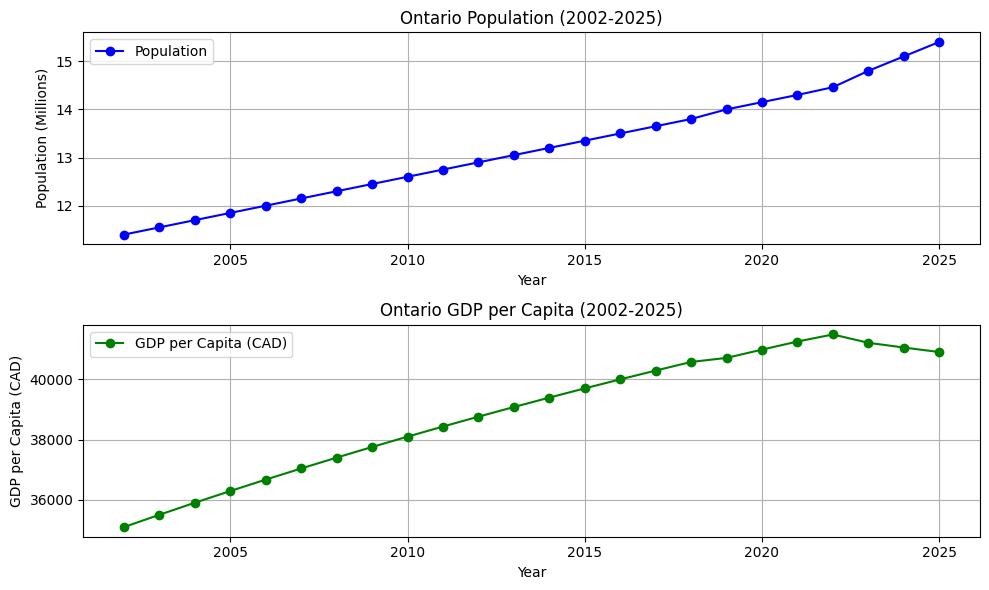

In [1]:
import asyncio
import platform
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import nest_asyncio  # Install via pip if not present: pip install nest_asyncio

# Apply nest_asyncio to allow nested event loops (e.g., in Jupyter)
nest_asyncio.apply()

# Simulated data (replace with actual API calls or local data)
years = list(range(2002, 2026))
population = [11400000, 11550000, 11700000, 11850000, 12000000, 12150000, 12300000, 12450000, 12600000, 12750000,
              12900000, 13050000, 13200000, 13350000, 13500000, 13650000, 13800000, 14000000, 14150000, 14300000,
              14460000, 14800000, 15100000, 15400000]  # Approx. values up to 2024, projected to 2025
gdp_billion = [400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590,
               600, 610, 620, 630]  # Approx. GDP in billions CAD, projected to 2025
gdp_per_capita = [x * 1000000000 / y for x, y in zip(gdp_billion, population)]

# Function to format y-axis labels in millions
def millions_formatter(x, pos):
    return f'{x * 1e-6:.1f}'  # Divide by 1,000,000 and format to 1 decimal place

# Setup function for plotting
def setup():
    plt.figure(figsize=(10, 6)) #facecolor='pink')

# Update loop for plotting
def update_loop():
    plt.subplot(2, 1, 1)
    plt.plot(years, [p / 1000000 for p in population], marker="o", label="Population", color="blue")  # Plot in millions
    asx = plt.gca()
    # asx.set_facecolor('lightgray')
    plt.title("Ontario Population (2002-2025)")
    plt.xlabel("Year")
    plt.ylabel("Population (Millions)")
    plt.legend()
    plt.grid(True)
    # Apply the custom formatter to the y-axis

    plt.subplot(2, 1, 2)
    plt.plot(years, gdp_per_capita, marker="o",label="GDP per Capita (CAD)", color="green")
    asx = plt.gca()
    # asx.set_facecolor('lightgreen')
    plt.title("Ontario GDP per Capita (2002-2025)")
    plt.xlabel("Year")
    plt.ylabel("GDP per Capita (CAD)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

# Main coroutine function
async def main():
    setup()
    update_loop()
    await asyncio.sleep(1.0 / 60)  # Simulate frame rate control
    plt.show()

# Execution logic adjusted for different environments
if platform.system() == "Emscripten":  # For web environments
    asyncio.ensure_future(main())
elif __name__ == "__main__":  # For standard Python execution
    # Get the current event loop
    loop = asyncio.get_event_loop()
    if loop.is_running():  # If loop is already running (e.g., Jupyter)
        asyncio.ensure_future(main())
    else:  # If no loop is running
        loop.run_until_complete(main())
else:  # For interactive environments like Jupyter
    asyncio.ensure_future(main())